In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from PIL import Image
import glob
import random
import pandas as pd
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [2]:
files=glob.glob("C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 3/dataset2/train/porn/*.jpg")
TrainData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,1))

files=glob.glob("C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 3/dataset2/train/not porn/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,0))

print("Done.")

random.shuffle(TrainData)

Done.


In [3]:
files=glob.glob("C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 3/dataset2/test/porn/*.jpg")
TestData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TestData.append((imgarray,1))

files=glob.glob("C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 3/dataset2/test/not porn/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TestData.append((imgarray,0))

print("Done.")

random.shuffle(TestData)

Done.


In [4]:
print("Train Data ",len(TrainData))
print("Test Data ",len(TestData))

Train Data  13314
Test Data  1399


In [5]:
Train_X = np.array([item[0] for item in TrainData])
Train_Y = np.array([item[1] for item in TrainData])

Test_X = np.array([item[0] for item in TestData])
Test_Y = np.array([item[1] for item in TestData])

Train_X = Train_X.astype('float32')
Test_X = Test_X.astype('float32')

Train_X /= 255
Test_X /= 255

In [6]:
model = keras.Sequential([
    keras.layers.AveragePooling2D((2,2),2,input_shape=(299,299,3)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])



C:\Users\Vulcano\anaconda3\Lib\site-packages\keras\src\layers\pooling\base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


In [7]:
model.compile(optimizer ='adam',loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [8]:
model.fit(Train_X, Train_Y, epochs = 50, batch_size = 100)

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 72s 488ms/step - accuracy: 0.7211 - loss: 0.4879
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 65s 482ms/step - accuracy: 0.9278 - loss: 0.1937
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 65s 480ms/step - accuracy: 0.9399 - loss: 0.1670
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 67s 501ms/step - accuracy: 0.9383 - loss: 0.1719
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 71s 511ms/step - accuracy: 0.9434 - loss: 0.1526
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 67s 499ms/step - accuracy: 0.9497 - loss: 0.1348
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 72s 538ms/step - accuracy: 0.9570 - loss: 0.1143
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 69s 502ms/step - accuracy: 0.9565 - loss: 0.1227
Epoch 9/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 65s 481ms/step - accuracy: 0.9553 - loss: 0.1242
Epoch 10/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 69s 509ms/step - accuracy: 0.9564 - loss: 0.1147
Epoch 11/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 69s 500ms/step - accuracy: 0.9605 - loss: 0.1052
Epoch 12/50
134/134

In [9]:
model.evaluate(Test_X,Test_Y)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9859 - loss: 0.0423


[0.04667123779654503, 0.9835596680641174]

In [10]:
Test_X

array([[[[0.34901962, 0.2901961 , 0.1764706 ],
         [0.36862746, 0.30980393, 0.19607843],
         [0.36862746, 0.29411766, 0.1764706 ],
         ...,
         [0.20392157, 0.13725491, 0.07450981],
         [0.18039216, 0.10980392, 0.05490196],
         [0.15686275, 0.08627451, 0.03921569]],

        [[0.34509805, 0.28627452, 0.17254902],
         [0.36862746, 0.30980393, 0.19607843],
         [0.36862746, 0.29411766, 0.1764706 ],
         ...,
         [0.20392157, 0.13725491, 0.07450981],
         [0.18039216, 0.10980392, 0.05490196],
         [0.15686275, 0.08627451, 0.03921569]],

        [[0.34509805, 0.28627452, 0.17254902],
         [0.36862746, 0.30980393, 0.19607843],
         [0.3647059 , 0.2901961 , 0.17254902],
         ...,
         [0.20392157, 0.13725491, 0.07450981],
         [0.18431373, 0.11372549, 0.05882353],
         [0.16078432, 0.09019608, 0.03529412]],

        ...,

        [[0.05490196, 0.1254902 , 0.13333334],
         [0.05490196, 0.1254902 , 0.13333334]

In [11]:
Predictions = model.predict(Test_X)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


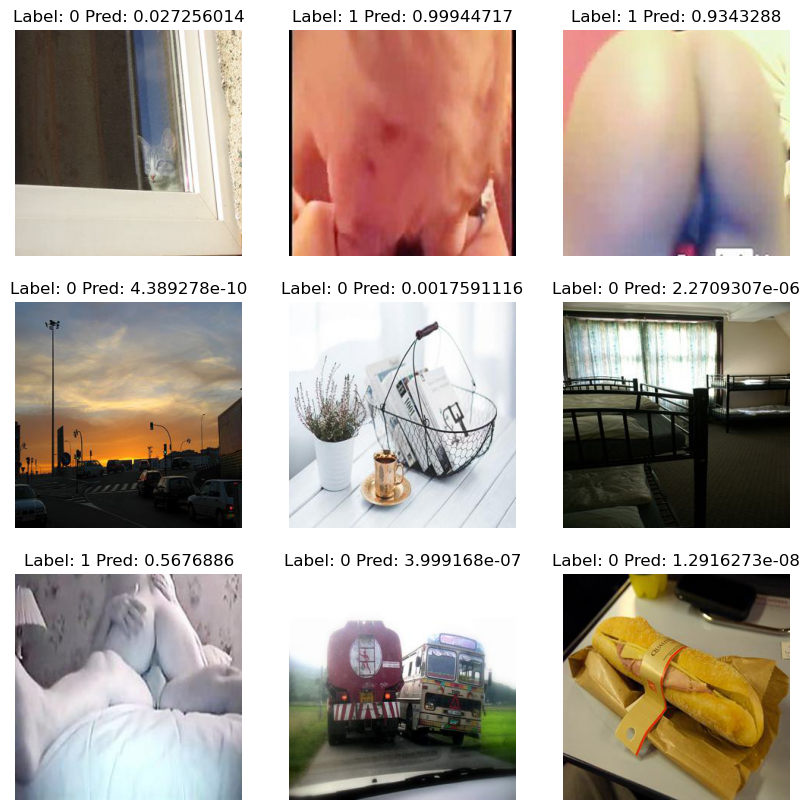

In [12]:
plt.figure(figsize=(10, 10))
a = 95
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(Test_X[i+a])
    plt.title("Label: "+str(Test_Y[i+a])+" Pred: "+str(Predictions[i+a][0]))
    plt.axis("off")

In [13]:
model.save('nsfw_model.h5')

In [17]:
model.save('nsfw_model.keras')

In [18]:
from tensorflow import keras
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('nsfw_model.keras')

C:\Users\Vulcano\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [19]:
# Load the new image
img = Image.open('C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 1/prediksi/1.jpg')

# Preprocess the image
img = img.resize((299, 299))  # Resize to match model's expected input size
img_array = np.array(img)  # Convert image to numpy array
img_array = img_array.astype('float32') / 255  # Normalize pixel values

# Expand dimensions to match model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Perform prediction
prediction = model.predict(img_array)

# The prediction will be a probability, if you have binary classification,
# you may round it to get the predicted class
predicted_class = round(prediction[0][0])

# Print the predicted class
if predicted_class == 1:
    print("Porn")
else:
    print("Not Porn")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Porn


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

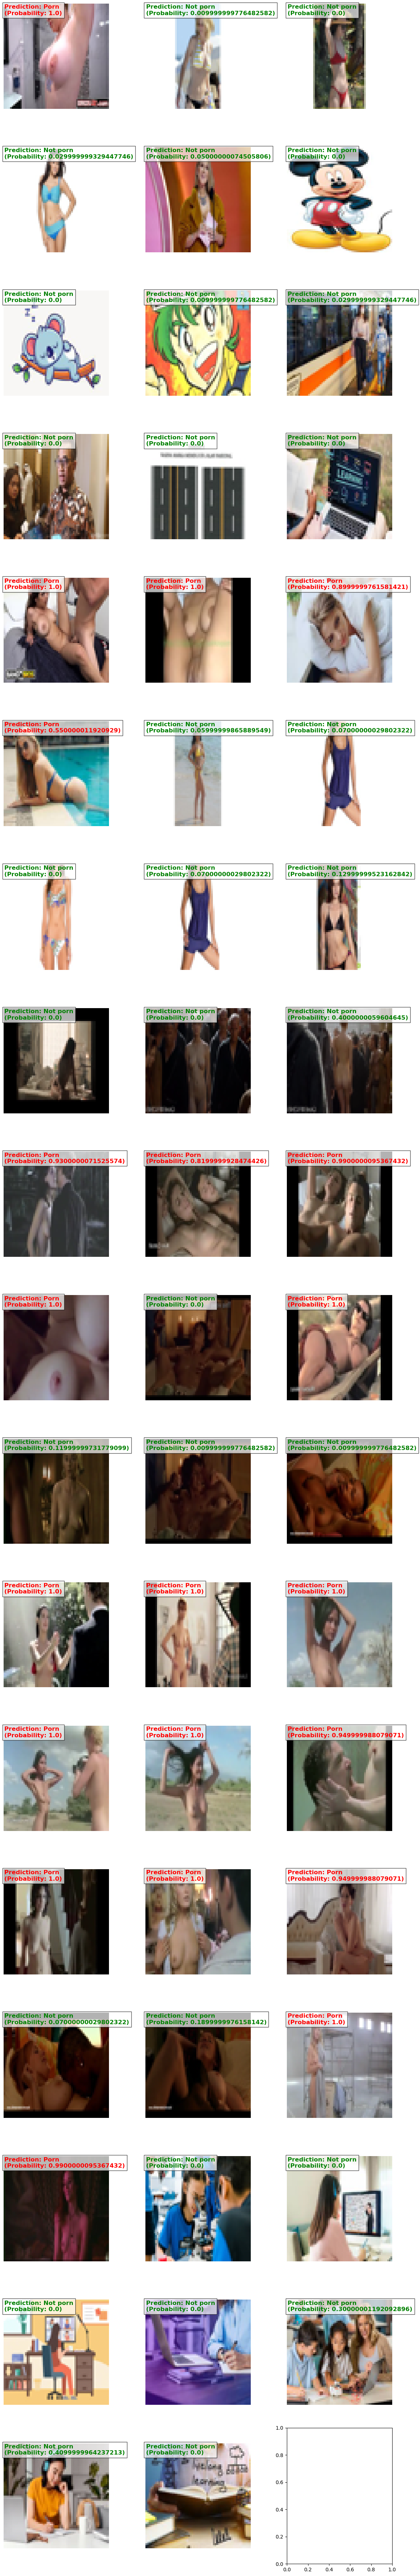

In [23]:
# Path to the folder containing images
folder_path = 'C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 1/prediksi'

# Get a list of image files
image_files = [file for file in os.listdir(folder_path) if file.endswith((".jpg", ".jpeg", ".png"))]

# Calculate the number of rows needed to display images in 3 columns
num_images = len(image_files)
num_rows = (num_images + 2) // 3  # Add 2 to round up to the nearest integer

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))

# Iterate through all images in the folder
for i, filename in enumerate(image_files):
    # Load the image
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path)

    # Preprocess the image
    img = img.resize((299, 299))  # Resize to match model's expected input size
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array.astype('float32') / 255  # Normalize pixel values

    # Expand dimensions to match model's input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Perform prediction
    prediction = model.predict(img_array)

    # Get the predicted class and probability
    predicted_class = round(prediction[0][0], 2)
    predicted_class_formatted = "{:.2f}".format(predicted_class)
    
    if predicted_class >= 0.5:
        predicted_label = "Porn"
        color = "red"
    else:
        predicted_label = "Not porn"
        color = "green"

    # Determine subplot position
    row = i // 3
    col = i % 3

    #resize before displaying
    img = img.resize((48, 48))
    
    # Display the image
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

    # Add text overlay
    axes[row, col].text(0, 0, f"Prediction: {predicted_label}\n(Probability: {predicted_class_formatted})",
                        color=color, fontsize=12, fontweight='bold',
                        bbox=dict(facecolor='white', alpha=0.7),
                        verticalalignment='top', horizontalalignment='left')

# Adjust layout
plt.tight_layout()
plt.show()
